# Sprint 5: S05 T01: Tasca mètodes de mostreig

#### Nivel I,I,II
#### Sampling Summary: Nivels I,II i III - Cuadros resúmenes y Boxplot 



## Nivell 1
### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [ ]:
import random as rd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

#### A) Data Frame

##### Para realizar este Sprint he seleccionado la información contenida en la página web: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
##### En esta web se encuentra disponible una base de datos histórica de los juegos olímpicos de verano e inviderno, desde Athens 1896 hasta Rio 2016

In [919]:
df_atletas= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint5\archive_olimpics\athlete_events.csv")
df_pais=pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint5\archive_olimpics\noc_regions.csv")

In [920]:
df_atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [921]:
df_atletas.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


##### Detalle de los campos:
##### El archivo atleta_eventos.csv contiene 271116 filas y 15 columnas; Cada fila corresponde a un atleta individual compitiendo en un evento olímpico individual.

###### ID - Unique number for each athlete;
###### Name - Athlete's name;
###### Sex - M or F;
###### Age - Integer;
###### Height - In centimeters;
###### Weight - In kilograms;
###### Team - Team name;
###### NOC - National Olympic Committee 3-letter code;
###### Games - Year and season;
###### Year - Integer;
###### Season - Summer or Winter;
###### City - Host city;
###### Sport - Sport;
###### Event - Event;
###### Medal - Gold, Silver, Bronze, or NA.

In [922]:
df_atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


##### Adicionalmente, existe otro Data Frame que contiene el país federado en el Comité Olímpico Internacional y la federaión a la que pertenecen.
##### Aunque es una información redundante, ya que la base da datos de atletas contiene la información del país por el que compiten los atletas, juntaremos los dos data frame para tener la información completa.

In [923]:
df_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [924]:
df_pais.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


##### Descripción de los campos:

###### NOC : Código Federación
###### region : País Federado
###### notes: comentarios

### B) Integración de los dos data frames

In [925]:
df_merged = pd.merge(df_atletas, df_pais, on='NOC', how='left')

In [926]:
df_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


#### C) Creación de una nueva variable BMI (ïndice de Masa Corpotal)

In [927]:
bmi = 10000 * df_merged["Weight"] / (df_merged["Height"] * df_merged["Height"])
df_merged["BMI"] = bmi

In [928]:
df_merged.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.959094


In [929]:
df_merged.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
BMI        True
dtype: bool

In [930]:
df_Age_ok = df_merged[np.isfinite(df_merged['Age'])]
df_Age_ok.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.959094


In [931]:
df_Age_ok.describe()

,ID,Age,Height,Weight,Year,BMI
count,261642.000000,261642.000000,210068.000000,207379.000000,261642.000000,206165.000000
mean,68291.263960,25.556898,175.351367,70.712603,1980.100221,22.784242
std,38997.527135,6.393561,10.524847,14.358602,28.629035,2.912173
min,1.000000,10.000000,127.000000,25.000000,1896.000000,8.360954
25%,34755.250000,21.000000,168.000000,60.000000,1964.000000,20.957171
50%,68198.000000,24.000000,175.000000,70.000000,1988.000000,22.530864
75%,102108.750000,28.000000,183.000000,79.000000,2004.000000,24.212293
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,63.901580


##### La media de edad de la base de datos sin valores nulos es de 25.557 años, y es la primera varible que vamos a usar para validar las muestras obtenidas.
##### Con el objeto de tener otra variable de control de las muestras propuestas, se ha definido la variable BMI que sintetiza en un índice, dos campos de información contenidos en el Data frame: Height y Weitht.
##### La media de BMI = 22.784, será otra de las variables de control para validar las muestras obtenidas.

#### D) Representación gráfica de la información relevante

##### d.1) Boxplot de distribución de las edades de los atletas por sexo (Age bySex)

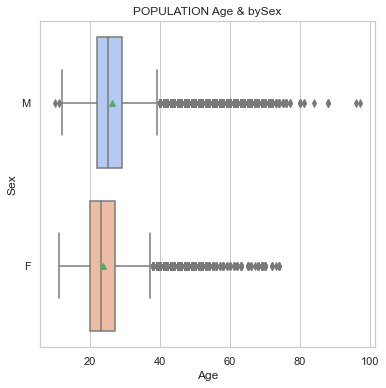

In [932]:
plt.figure(figsize=(6,6))
plt.title('POPULATION Age & bySex')
plot1= sns.boxplot(data=df_Age_ok.sort_values(by="Age",ascending=True), x="Age", y="Sex", orient="h", showmeans=True, palette="coolwarm")
plot1.figure.savefig("Grafico1_age_sex_plot.png")

In [859]:
real_mean =round( df_Age_ok.Age.sum()/len(df_Age_ok),3)
print("Edad Media de la Población: ", real_mean)

Edad Media de la Población:  25.557


In [933]:
real_bySex_mean= df_Age_ok.groupby(by="Sex").mean("Age")
print("Edad Media de la Población bySex", round(real_bySex_mean["Age"],3))

Edad Media de la Población bySex Sex
F    23.733
M    26.278
Name: Age, dtype: float64


##### d.2) Boxplot de distribución de las edades de los atletas por Medallas y sexo (Age/ Medal bySex)

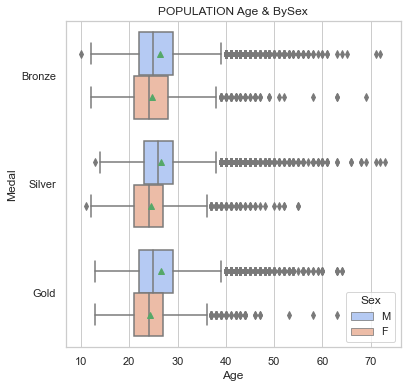

In [934]:
plt.figure(figsize=(6,6))
plt.title(f'POPULATION Age & BySex')
plot1= sns.boxplot(data=df_Age_ok.sort_values(by="Age",ascending=True), x="Age", y="Medal", hue="Sex",orient="h", showmeans=True, palette="coolwarm")
plot1.figure.savefig("Grafico1_age_Sex_Medal_plot.png")

##### d.3) Boxplot de distribución del BMI de los atletas por Medallas y sexo (BMI / Medal bySex)

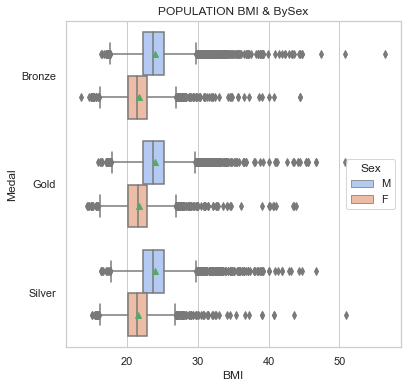

In [935]:
plt.figure(figsize=(6,6))
plt.title(f'POPULATION BMI & BySex')
plot1= sns.boxplot(data=df_Age_ok.sort_values(by="BMI",ascending=True), x="BMI", y="Medal",hue="Sex",orient="h", showmeans=True, palette="coolwarm")
plot1.figure.savefig("Grafico1_BMI_Medal_Sex_plot.png")

#### E) Simple random sampling

In [936]:
df_Age_ok.shape

(261642, 18)

In [937]:
df=df_Age_ok
simple_rand = df.sample(frac=0.1, replace=True, random_state=26164)

In [938]:
simple_rand.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
90047,45631,Lynley Joye Hannen (-Coventry),F,24.0,175.0,70.0,New Zealand,NZL,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Women's Coxless Pairs,Bronze,New Zealand,NaN,22.857143
53951,27679,Hilaire Walter Deprez,M,30.0,NaN,NaN,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Canoeing,"Canoeing Men's Kayak Singles, 10,000 metres",NaN,Belgium,NaN,NaN
80634,40939,Gerald Sydney Goddard,M,31.0,NaN,NaN,South Africa,RSA,1952 Summer,1952,Summer,Helsinki,Water Polo,Water Polo Men's Water Polo,NaN,South Africa,NaN,NaN
111309,56315,Josef Jungmann,M,36.0,NaN,NaN,Czechoslovakia,TCH,1924 Summer,1924,Summer,Paris,Fencing,"Fencing Men's epee, Individual",NaN,Czech Republic,NaN,NaN
48750,25126,Ezio Damolin,M,23.0,178.0,68.0,Italy,ITA,1968 Winter,1968,Winter,Grenoble,Nordic Combined,Nordic Combined Men's Individual,NaN,Italy,NaN,21.461937


In [939]:
simple_rand.shape

(26164, 18)

In [866]:
simple_rand_mean= simple_rand["Age"].mean()
print("Edad Media Simple Random Sampling : ", round(simple_rand_mean,3))

Media de edades de la Simple Random Sampling :  25.581


In [940]:
simple_rand_bySex_mean= simple_rand.groupby(by="Sex").mean("Age")
print("Edad Media Simple Random Sampling by", round(simple_rand_bySex_mean["Age"],3))

Edad Media Simple Random Sampling by Sex
F    23.852
M    26.252
Name: Age, dtype: float64


#### F) Systematic sampling

In [807]:
index = np.arange(0,len(df_Age_ok),step=10)
systematic_sample = df.iloc[index]
systematic_sample.head()   

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN,21.220009
20,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN,21.499597
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,Finland,NaN,23.095037
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,25.106333


In [808]:
systematic_sample.describe()

,ID,Age,Height,Weight,Year,BMI
count,26165.000000,26165.000000,21060.000000,20815.000000,26165.000000,20686.000000
mean,68290.991630,25.550468,175.427825,70.870478,1980.239786,22.820887
std,38999.405751,6.466348,10.542359,14.455721,28.620467,2.926969
min,1.000000,11.000000,135.000000,25.000000,1896.000000,12.267562
25%,34755.000000,21.000000,168.000000,60.000000,1964.000000,20.983988
50%,68198.000000,24.000000,175.000000,70.000000,1988.000000,22.587833
75%,102108.000000,28.000000,183.000000,79.250000,2004.000000,24.221453
max,135571.000000,88.000000,223.000000,167.000000,2016.000000,50.975245


In [942]:
systematic_mean = round(systematic_sample.Age.mean(),3)
print("Edad Media Systematic Sampling: ", systematic_mean)

Edad Media Systematic Sampling:  25.55


In [943]:
systematic_bySex_mean= systematic_sample.groupby(by="Sex").mean("Age")
print("Edad Media Systematic sampling by", round(systematic_bySex_mean["Age"],3))

Edad Media Systematic sampling by Sex
F    23.735
M    26.267
Name: Age, dtype: float64


## Nivell 2
### Exercici 2
#### Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

#### G) Stratified sampling

In [944]:
df= df_Age_ok 
df["Medal"].fillna("No Medal", inplace = True) 
df[['Medal', 'Sex']].value_counts()

Medal     Sex
No Medal  M      159729
          F       62862
Gold      M        9480
Bronze    M        9243
Silver    M        9092
Bronze    F        3763
Gold      F        3744
Silver    F        3729
dtype: int64

In [945]:
train, stratified_sample = train_test_split(df, test_size=0.1, stratify=df[['Medal', 'Sex']])

In [946]:
stratified_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
1829,1012,Rubn Adorno Melndez,M,23.0,190.0,91.0,Puerto Rico,PUR,1964 Summer,1964,Summer,Tokyo,Basketball,Basketball Men's Basketball,No Medal,Puerto Rico,NaN,25.207756
231605,116195,Kyoji Suga,M,28.0,173.0,61.0,Japan,JPN,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Men's 10 kilometres Sprint,No Medal,Japan,NaN,20.381570
239227,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,19.0,177.0,69.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold,USA,NaN,22.024323
237101,118900,"James ""Jack"" Taylor",M,24.0,NaN,NaN,Great Britain,GBR,1956 Summer,1956,Summer,Melbourne,Wrestling,"Wrestling Men's Lightweight, Freestyle",No Medal,UK,NaN,NaN
46593,24046,Julia Mara Cruz Palacios,F,23.0,166.0,49.0,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Diving,Diving Women's Springboard,No Medal,Spain,NaN,17.781971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73191,37203,Johan Mohr Friele,M,53.0,NaN,NaN,Heira II,NOR,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 12 metres,Gold,Norway,NaN,NaN
135228,68032,Lee Jun-Ho,M,28.0,171.0,65.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,No Medal,South Korea,NaN,22.229062
219373,110198,Ioannis Sidiropoulos,M,32.0,160.0,60.0,Greece,GRE,1988 Summer,1988,Summer,Seoul,Weightlifting,Weightlifting Men's Featherweight,No Medal,Greece,NaN,23.437500
123885,62581,Georgios Kontogouris,M,24.0,190.0,100.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Sailing,Sailing Men's Two Person Keelboat,No Medal,Greece,NaN,27.700831


In [947]:
stratified_sample[['Medal', 'Sex']].value_counts()

Medal     Sex
No Medal  M      15973
          F       6287
Gold      M        948
Bronze    M        924
Silver    M        909
Bronze    F        376
Gold      F        375
Silver    F        373
dtype: int64

In [948]:
stratified_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26165 entries, 1829 to 171205
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      26165 non-null  int64  
 1   Name    26165 non-null  object 
 2   Sex     26165 non-null  object 
 3   Age     26165 non-null  float64
 4   Height  20945 non-null  float64
 5   Weight  20662 non-null  float64
 6   Team    26165 non-null  object 
 7   NOC     26165 non-null  object 
 8   Games   26165 non-null  object 
 9   Year    26165 non-null  int64  
 10  Season  26165 non-null  object 
 11  City    26165 non-null  object 
 12  Sport   26165 non-null  object 
 13  Event   26165 non-null  object 
 14  Medal   26165 non-null  object 
 15  region  26137 non-null  object 
 16  notes   458 non-null    object 
 17  BMI     20533 non-null  float64
dtypes: float64(4), int64(2), object(12)
memory usage: 3.8+ MB


##### Como se puede observar, la muestra estratificada se corresponde exáctamente con el 10% de los registros por tipos de medallas del Data frame original

In [949]:
stratified_mean = round(stratified_sample.Age.mean(),3)
print("Edad Media Stratified Sample: ", stratified_mean)

Edad Media Stratified Sample:  25.585


In [950]:
stratified_bySex_mean= stratified_sample.groupby(by="Sex").mean("Age")
print("Edad Media Stratified Sample by", round(stratified_bySex_mean["Age"],3))

Edad Media Stratified Sample by Sex
F    23.701
M    26.330
Name: Age, dtype: float64


#### H) SMOTE (Synthetic Minority Oversampling Technique)

"""
En muchas ocasiones, en un problema de clasificación ocurre que las clases que hay que discriminar no están representadas proporcionalmente, sino que una clase predomina sobre las otras o bien una clase tiene muy pocos elementos en el conjunto de datos.

Si se intenta construir un clasificador directamente sin tener en cuenta este desequilibrio, el clasificador resultante seguramente tenderá a predecir la clase mayoritaria, dado que esa acción minimiza el error cometido al acertar la mayoría de veces, y clasificará erróneamente de forma sistemática los elementos de la clase minoritaria, los cuales, en ocasiones, son seguramente los más interesantes.

Para solucionar este problema existen diferentes técnicas, como por ejemplo SMOTE, acrónimo de Synthetic Minority Oversampling Technique, basada en generar de forma sintética nuevos elementos de la clase minoritaria usando como referencia los elementos de dicha clase ya presentes en el conjunto de datos.

SMOTE es un algoritmo que a partir de un elemento de la clase minoritaria elegido al azar, escoge un cierto número de vecinos más cercanos y  genera un nuevo elemento combinándolos linealmente de forma ponderada, e introduciendo un factor aleatorio para generar elementos parecidos. Existen diferentes versiones del algoritmo en función de cuántos vecinos y cómo se combinan para generar uno nuevo. Si repetimos este proceso es posible generar tantos elementos de la clase minoritaria como sea necesario para equilibrar el conjunto de datos.
"""

"""
Las ventajas de SMOTE son:

a) La información no se pierde

b) Esta técnica es sencilla y se puede interpretar e implementar fácilmente en el modelo

c) Mejora el overfitting como ejemplos sintéticos. Esto ayudará a generar nuevas instancias en lugar de replicarlas

"""

In [ ]:
df= df_Age_ok.dropna()
df= df.loc[:,['Age','Sex','Medal','BMI']]

In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3477 entries, 734 to 270957
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     3477 non-null   float64
 1   Sex     3477 non-null   object 
 2   Medal   3477 non-null   object 
 3   BMI     3477 non-null   float64
dtypes: float64(2), object(2)
memory usage: 135.8+ KB


In [953]:
oversample = SMOTE(sampling_strategy='not majority', k_neighbors=2, random_state=2578)
X, y = oversample.fit_resample(df[['Age','BMI']], df[['Sex']])
y.value_counts()

Sex
F      2758
M      2758
dtype: int64

In [954]:
X['Sex'] = y
stratified_SMOTE=(X.groupby('Sex').apply(lambda x: x.sample(n=138, random_state=2758)).reset_index(level=0, drop=True))

In [955]:
stratified_SMOTE_mean= stratified_SMOTE.Age.mean()
print("Edad Media Stratified_SMOTE : ", stratified_SMOTE_mean)

Edad Media Stratified_SMOTE :  24.37018125475649


##### La media de edad obtenida en este método es infeerior al la obtenida en el resto de métodos, porque el SMOTE no admite valores nulos en el Data Frame
##### la población se ha reducido al número de atletas que tenían medalas con valor no nulo, 2.758 y es sobre la cual se va a extraer la muestra
##### Por este motivo no se va a incluir los resultados en los cuadros resúmenes de todos los métodos.

In [956]:
stratified_SMOTE_bySex_mean=stratified_SMOTE.groupby('Sex').Age.mean()
print("Edad Media Stratified_SMOTE by",stratified_SMOTE_bySex_mean)

Edad Media Stratified_SMOTE by Sex
F    23.450507
M    25.289855
Name: Age, dtype: float64


In [957]:
stratified_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 5117 to 2811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     276 non-null    float64
 1   BMI     276 non-null    float64
 2   Sex     276 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


In [958]:
stratified_SMOTE.Sex.value_counts(normalize=True)

F    0.5
M    0.5
Name: Sex, dtype: float64

In [959]:
stratified_SMOTE.head()

,Age,BMI,Sex
5117,19.0,20.077748,F
4010,25.0,19.227688,F
3748,26.0,20.446742,F
4936,19.0,19.918367,F
4984,28.0,18.975448,F


## Nivell 3
### Exercici 3
#### I) Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [960]:
def reservoir_sampling(sample, population):
    reservoir = []
    for i in range(population):
        if i < sample:
            reservoir.append(i)
        else:
            j = rd.randint(0, i)
            if j < sample:
                reservoir[j] = i
    return reservoir

In [961]:
sample = int(len(df_Age_ok)*0.1)+1
population = len(df_Age_ok)
reservoir_sample_index = reservoir_sampling(sample, population)

In [962]:
population

261642

In [963]:
sample

26165

In [964]:
print(reservoir_sample_index[1:20])

[84149, 80076, 240423, 232380, 5, 160695, 137827, 59785, 192278, 73416, 181517, 250264, 234365, 199091, 260781, 45647, 149740, 180640, 62917]


In [965]:
reservoir_sample = df_Age_ok.iloc[reservoir_sample_index]

In [966]:
reservoir_mean = round(reservoir_sample.Age.mean(),3)
print("Edad Media Reservoir Sample: ", reservoir_mean)

Edad Media Reservoir Sample:  25.515


In [967]:
reservoir_bySex_mean= reservoir_sample.groupby(by="Sex").mean("Age")
print("Edad Media Reservoir Sample by", round(reservoir_bySex_mean["Age"],3))

Edad Media Reservoir Sample by Sex
F    23.595
M    26.274
Name: Age, dtype: float64


In [968]:
reservoir_bySex_mean.shape

(2, 6)

In [969]:
reservoir_sample.to_csv('reservoir_sample.csv')

In [970]:
print(reservoir_bySex_mean)

               ID        Age      Height     Weight         Year        BMI
Sex                                                                        
F    69447.596032  23.594817  167.757981  59.859728  1992.708598  21.163165
M    67839.692952  26.273512  178.889400  75.863956  1975.384517  23.561277


## Sampling Summary: Nivels I,II i III

### 1. Comparación Age mean:

In [971]:
# Data Summary
# Create a dictionary with the mean outcomes
outcomes = {'sample_mean':[simple_rand_mean, systematic_mean,stratified_mean ,stratified_SMOTE_mean, reservoir_mean ],'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling', 'Stratified Sampling','(*)Stratified SMOTE Sampling','Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['%_error'] = (abs(outcomes['real_mean'] - outcomes['sample_mean']))/outcomes['real_mean'] *100

# Sort data frame by absolute error
outcomes.sort_values(by='real_mean')

,sample_mean,real_mean,%_error
Simple Random Sampling,25.581371,25.557,0.095361
Systematic Sampling,25.550000,25.557,0.027390
Stratified Sampling,25.585000,25.557,0.109559
(*)Stratified SMOTE Sampling,24.370181,25.557,4.643811
Reservoir Sampling,25.515000,25.557,0.164339


##### La muestra que más se ajunta a la media de edad de la Población es la obtenida con Systematic Samplig.
##### (*) Los resultados obtenidos con el método Stratified SMOTE Sampling no son comparables con el resto de muestras, al haber tenido que reducir los registros que contenian valores "NaN".

### 2. Comparación Age bySex mean - Female:

In [972]:
# Data Summary Mujeres
# Create a dictionary with the mean outcomes
outcomes = {'Female_sample_mean':[simple_rand_bySex_mean["Age"]["F"], systematic_bySex_mean["Age"]["F"],stratified_bySex_mean["Age"]["F"], reservoir_bySex_mean["Age"]["F"]],'Female_real_mean':real_bySex_mean["Age"]["F"]}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling', 'Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['%_error'] = (abs(outcomes['Female_real_mean'] - outcomes['Female_sample_mean']))/outcomes['Female_real_mean'] *100

# Sort data frame by absolute error
outcomes.sort_values(by='Female_real_mean')

,Female_sample_mean,Female_real_mean,%_error
Simple Random Sampling,23.852495,23.732881,0.504002
Systematic Sampling,23.735044,23.732881,0.009114
Stratified Sampling,23.700850,23.732881,0.134963
Reservoir Sampling,23.594817,23.732881,0.581740


##### Para el grupo de atletas femeninas el método que mejor ajusta la edad media es el Systematic Sampling y el segundo que mejor es Reservoir Sampling

### 3. Comparación Age bySex mean - Male:

In [973]:
# Data Summary Male
# Create a dictionary with the mean outcomes
outcomes = {'Male_sample_mean':[simple_rand_bySex_mean["Age"]["M"], systematic_bySex_mean["Age"]["M"], stratified_bySex_mean["Age"]["M"] ,reservoir_bySex_mean["Age"]["M"]],'Male_real_mean':real_bySex_mean["Age"]["M"]}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling' ,'Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['%_error'] = (abs(outcomes['Male_real_mean'] - outcomes['Male_sample_mean']))/outcomes['Male_real_mean']*100

# Sort data frame by absolute error
outcomes.sort_values(by='Male_real_mean')

,Male_sample_mean,Male_real_mean,%_error
Simple Random Sampling,26.252321,26.277562,0.096053
Systematic Sampling,26.267058,26.277562,0.039973
Stratified Sampling,26.329583,26.277562,0.197969
Reservoir Sampling,26.273512,26.277562,0.015409


##### Para el grupo de aletas masculinos, el método que más aproxima la edad media es Stratified Sampling y el segundo mejor es Systematic Sampling

### 4. Comparación BMI - Female:

In [974]:
# Data Summary Female
# Create a dictionary with the mean outcomes
outcomes = {'FemaleBMI_sample_mean':[simple_rand_bySex_mean["BMI"]["F"], systematic_bySex_mean["BMI"]["F"],stratified_bySex_mean["BMI"]["F"] ,reservoir_bySex_mean["BMI"]["F"]],'FemaleBMI_real_mean':real_bySex_mean["BMI"]["F"]}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling', 'Stratified Sampling','Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['%_error'] = (abs(outcomes['FemaleBMI_real_mean'] - outcomes['FemaleBMI_sample_mean']))/outcomes['FemaleBMI_real_mean']*100

# Sort data frame by absolute error
outcomes.sort_values(by='FemaleBMI_real_mean')

,FemaleBMI_sample_mean,FemaleBMI_real_mean,%_error
Simple Random Sampling,21.183741,21.193276,0.044990
Systematic Sampling,21.232328,21.193276,0.184265
Stratified Sampling,21.152128,21.193276,0.194154
Reservoir Sampling,21.163165,21.193276,0.142079


##### En el caso del BMI la muestra que mejor representa la media de dicha variable en relación a la población de atletas femeninas es SImple Random Sampling

### 5. Comparación BMI - Male:

In [975]:
# Data Summary Male
# Create a dictionary with the mean outcomes
outcomes = {'MaleBMI_sample_mean':[simple_rand_bySex_mean["BMI"]["M"], systematic_bySex_mean["BMI"]["M"],stratified_bySex_mean["BMI"]["M"] ,reservoir_bySex_mean["BMI"]["M"]],'MaleBMI_real_mean':real_bySex_mean["BMI"]["M"]}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling','Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['%_error'] = (abs(outcomes['MaleBMI_real_mean'] - outcomes['MaleBMI_sample_mean']))/outcomes['MaleBMI_real_mean']*100

# Sort data frame by absolute error
outcomes.sort_values(by='MaleBMI_real_mean')

,MaleBMI_sample_mean,MaleBMI_real_mean,%_error
Simple Random Sampling,23.545404,23.545317,0.000370
Systematic Sampling,23.582727,23.545317,0.158883
Stratified Sampling,23.542989,23.545317,0.009889
Reservoir Sampling,23.561277,23.545317,0.067781


##### Se cumple también en el caso del BMI medio de la población de atletas masculinos donde la muestra que mejor se aproxima es SImple Random Sampling

### 6. Resumén gráfico de Boxplot de las diferentes muestras y categorías de datos

#### 6.1 Population Boxplot

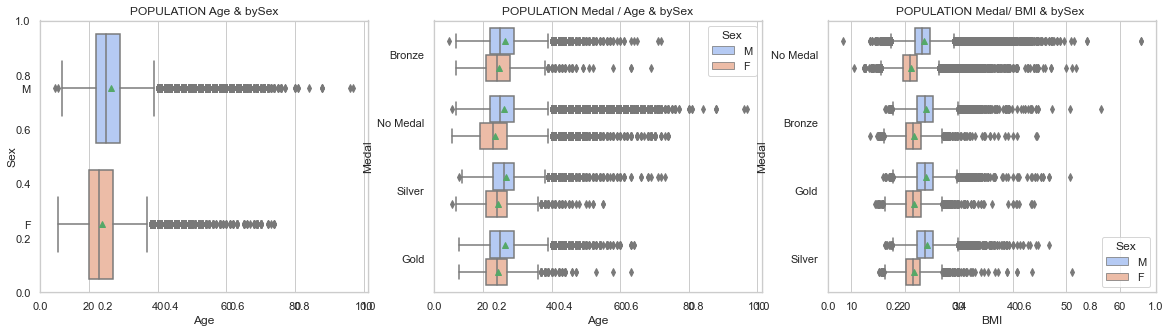

In [976]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1 = fig.add_subplot(1, 3, 1)
sns.set(style="whitegrid")
plt.title('POPULATION Age & bySex')
ax1= sns.boxplot(data=df_Age_ok.sort_values(by="Age"), x="Age", y="Sex", orient="h", showmeans=True, palette="coolwarm")

ax2 = fig.add_subplot(1, 3, 2)
sns.set(style="whitegrid")
plt.title('POPULATION Medal / Age & bySex')
ax2= sns.boxplot(data=df_Age_ok.sort_values(by="Age"), x="Age", y="Medal", hue="Sex",orient="h", showmeans=True, palette="coolwarm")

ax3 = fig.add_subplot(1, 3, 3)
sns.set(style="whitegrid")
plt.title('POPULATION Medal/ BMI & bySex ')
ax3= sns.boxplot(data=df_Age_ok.sort_values(by="BMI"), x="BMI", y="Medal",hue="Sex",orient="h", showmeans=True, palette="coolwarm")


##### En relación a los datos de la Población, la edad media de las mujeres atletas es inferior a la de los hombres en todas las categorias: Age bySEx y Medal/Age bySex 
##### En relación a Índice de masa corporal y tipos de medallas, las mujeres tienen una media de BMI inferior al de los hombres en todos los apartados

#### 6.2 Simple Random Sample Boxplot

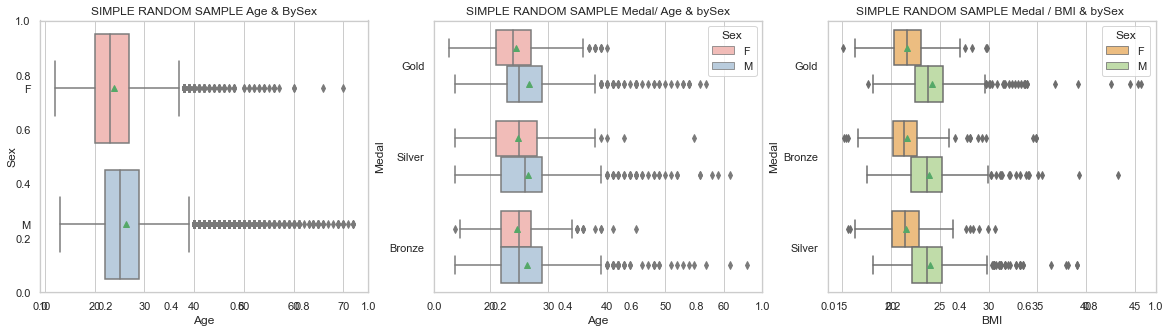

In [977]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1 = fig.add_subplot(1, 3, 1)
sns.set(style="whitegrid")
plt.title(f'SIMPLE RANDOM SAMPLE Age & BySex')
ax4= sns.boxplot(data=simple_rand.sort_values(by="Age"), x="Age", y="Sex",orient="h", showmeans=True,palette="Pastel1")

ax2 = fig.add_subplot(1, 3, 2)
sns.set(style="whitegrid")
plt.title(f'SIMPLE RANDOM SAMPLE Medal/ Age & bySex')
ax5= sns.boxplot(data=simple_rand.sort_values(by="Age"), x="Age", y="Medal", hue="Sex",orient="h", showmeans=True, palette="Pastel1")

ax3 = fig.add_subplot(1, 3, 3)
sns.set(style="whitegrid")
plt.title(f'SIMPLE RANDOM SAMPLE Medal / BMI & bySex ')
ax6= sns.boxplot(data=simple_rand.sort_values(by="BMI"), x="BMI", y="Medal",orient="h", hue="Sex",showmeans=True, palette="Spectral")

##### Esta muestra es la que mejor se ajusta a la media del BMI tanto en el colectivo de atletas femeninas como masculinos 

#### 6.3 Systematic Sample Boxplot

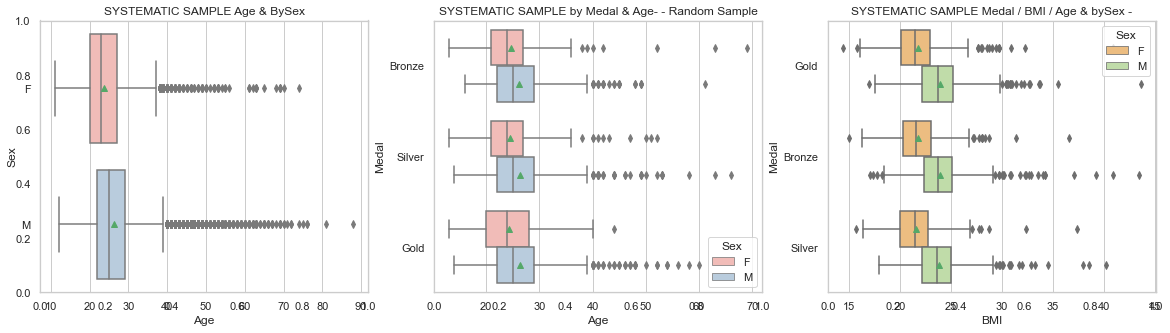

In [978]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1 = fig.add_subplot(1, 3, 1)
sns.set(style="whitegrid")
plt.title(f'SYSTEMATIC SAMPLE Age & BySex')
ax4= sns.boxplot(data=systematic_sample.sort_values(by="Age"), x="Age", y="Sex",orient="h", showmeans=True,palette="Pastel1")

ax2 = fig.add_subplot(1, 3, 2)
sns.set(style="whitegrid")
plt.title(f'SYSTEMATIC SAMPLE Medal / Age & bySex')
ax5= sns.boxplot(data=systematic_sample.sort_values(by="Age"), x="Age", y="Medal", hue="Sex",orient="h", showmeans=True, palette="Pastel1")
plt.title(f'SYSTEMATIC SAMPLE by Medal & Age- - Random Sample')

ax3 = fig.add_subplot(1, 3, 3)
sns.set(style="whitegrid")
plt.title(f'SYSTEMATIC SAMPLE Medal / BMI / Age & bySex -')
ax6= sns.boxplot(data=systematic_sample.sort_values(by="BMI"), x="BMI", y="Medal",orient="h", hue="Sex",showmeans=True, palette="Spectral")

##### La muestra obtenida con el método Systematic Sampling es la que mejor se ajusta a la edad media en las clasificaciones por Age bySex y Medal/Age bySex

#### 6.4 Stratified Sample Boxplot

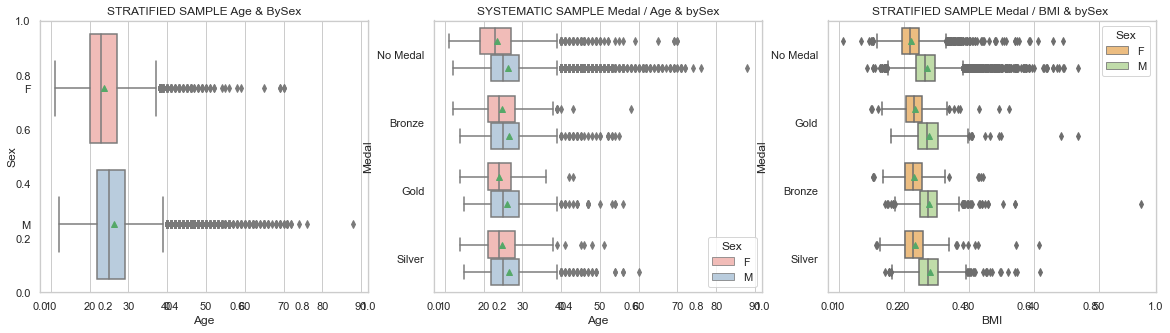

In [979]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax1 = fig.add_subplot(1, 3, 1)
sns.set(style="whitegrid")
plt.title(f'STRATIFIED SAMPLE Age & BySex')
ax4= sns.boxplot(data=stratified_sample.sort_values(by="Age"), x="Age", y="Sex",orient="h", showmeans=True,palette="Pastel1")

ax2 = fig.add_subplot(1, 3, 2)
sns.set(style="whitegrid")
plt.title(f'STRATIFIED SAMPLE Medal / Age & bySex')
ax5= sns.boxplot(data=stratified_sample.sort_values(by="Age"), x="Age", y="Medal", hue="Sex",orient="h", showmeans=True, palette="Pastel1")
plt.title(f'SYSTEMATIC SAMPLE Medal / Age & bySex')

ax3 = fig.add_subplot(1, 3, 3)
sns.set(style="whitegrid")
plt.title(f'STRATIFIED SAMPLE Medal / BMI & bySex ')
ax6= sns.boxplot(data=stratified_sample.sort_values(by="BMI"), x="BMI", y="Medal", hue="Sex",orient="h",showmeans=True, palette="Spectral")

##### Las atletas con medalla , se corresponde con el colectivo minoritario y queda infrarepresentado en los métodos de muestreo generales.
##### Este método, por tanto, mejora las edades medias del colectivo de atletas femeninas clasificadas por tipos de medalla en relación a la edad media de la Población de Sex= femenino

#### 6.5 Stratified SMOTE Boxplot

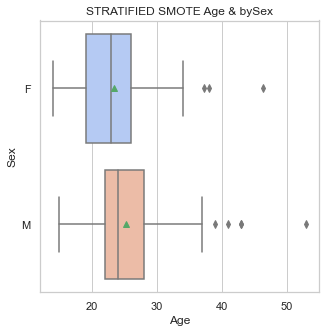

In [980]:
plt.figure(figsize=(5,5))
plt.title('STRATIFIED SMOTE Age & bySex')
plot1= sns.boxplot(data=stratified_SMOTE.sort_values(by="Age",ascending=True), x="Age", y="Sex", orient="h", showmeans=True, palette="coolwarm")
plot1.figure.savefig("Grafico1_age_sex_plot.png")

##### (*) Los resultados obtenidos con el método Stratified SMOTE Sampling no son comparables con el resto de muestras, al haber tenido que reducir los registros que contenian valores "NaN"

#### 6.6 Reservoir Sample Boxplot

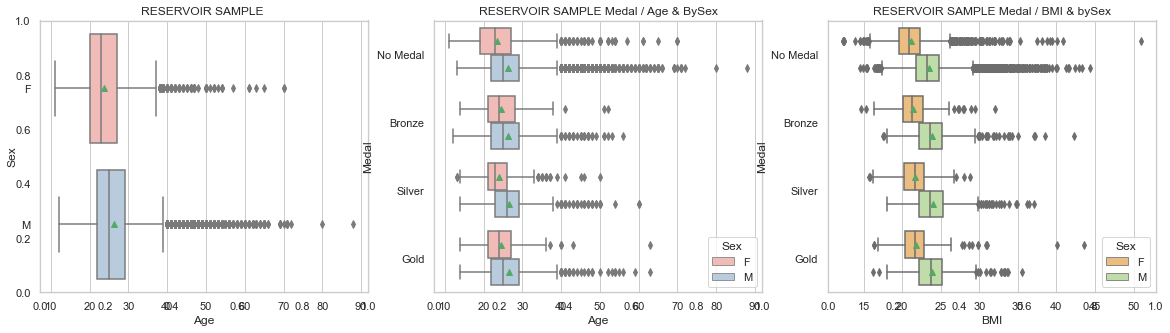

In [981]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

ax4 = fig.add_subplot(1, 3, 1)
sns.set(style="whitegrid")
plt.title(f'RESERVOIR SAMPLE ')
ax4= sns.boxplot(data= reservoir_sample.sort_values(by="Age"), x="Age", y="Sex",orient="h", showmeans=True,palette="Pastel1")

ax5 = fig.add_subplot(1, 3, 2)
sns.set(style="whitegrid")
plt.title(f'RESERVOIR SAMPLE Medal / Age & BySex')
ax5= sns.boxplot(data= reservoir_sample.sort_values(by="Age"), x="Age", y="Medal",orient="h", hue="Sex",showmeans=True, palette="Pastel1")

ax6 = fig.add_subplot(1, 3, 3)
sns.set(style="whitegrid")
plt.title(f'RESERVOIR SAMPLE Medal / BMI & bySex')
ax6= sns.boxplot(data= reservoir_sample.sort_values(by="BMI"), x="BMI", y="Medal",orient="h", hue="Sex",showmeans=True, palette="Spectral")

##### Este método de muestreo es uno de los que mejor ajusta la edad média del colectivo de atletas femeninas clasificadas por tipos de medallas